In [61]:
import pandas as pd
import numpy as np
import time
from datetime import date
file1 = pd.read_csv('marketing_customer_analysis.csv')

In [62]:
file1.shape

(9134, 24)

In [63]:
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [64]:
#file1 = file1.drop(['Unnamed: 0'], axis=1)

In [65]:
cols = []
for column in file1.columns:
    cols.append(column.lower())
file1.columns = cols

In [66]:
file1.columns = file1.columns.map(lambda x : x.replace("-", "_").replace(" ", "_"))

file1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [67]:
print(file1.dtypes)
file1._get_numeric_data()
file1.select_dtypes(['object'])

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [68]:
file1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [69]:
#vehicle type is useless so drop the column, and the other NaN are small amounts so ill drop them too

#file1 = file1.dropna()
#file1 = file1.drop(['vehicle_type'], axis=1)

In [70]:
file1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [71]:
file1['effective_to_date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [72]:
#converting datatype to datetime

file1['effective_to_date']= pd.to_datetime(file1['effective_to_date'], errors='coerce')

In [73]:
file1.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [74]:
file1['month'] = file1['effective_to_date'].dt.month

file1.head()



,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


# Start of Lab 3

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Show DataFrame info.

In [76]:
print(file1.dtypes)
print(file1.shape)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## Describe DataFrame.

In [77]:
file1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [78]:
#wanted to round to 2 decimals but cant make the function work

#file1['response']= pd.to_numeric(file1['response'], errors='coerce')
#file1 = file1.apply(lambda x : round(x, 2))

file1 = np.round(file1, decimals=2)

In [79]:
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize,2
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize,1
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize,2


## Show a plot of the total number of responses.

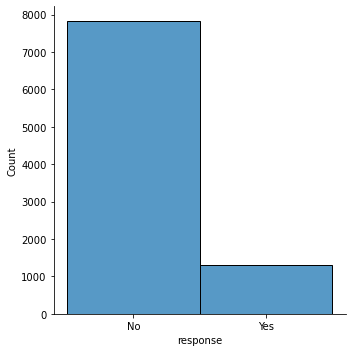

In [80]:
sns.displot(file1['response'])
plt.show()

## Show a plot of the response rate by the sales channel.

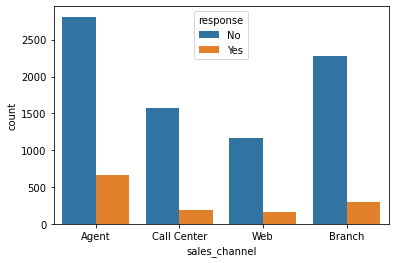

In [81]:
sns.countplot(x="sales_channel", hue="response", data=file1)

plt.show()


In [82]:
file1['sales_channel'].unique()


array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [83]:
file1['response_rate']=np.where(file1.response=='Yes',1,0)


<AxesSubplot:xlabel='sales_channel'>

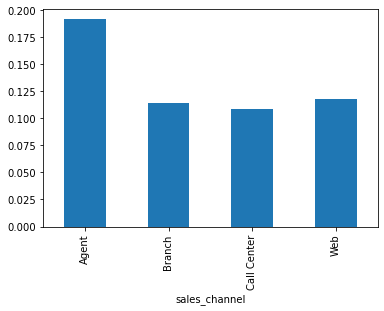

In [84]:
file1.groupby('sales_channel')['response_rate'].mean().plot.bar()

#https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14



## Show a plot of the response rate by the total claim amount.

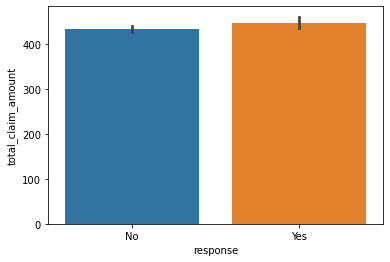

In [85]:
sns.barplot(x="response", y="total_claim_amount", data=file1)
plt.show()

# I don't know what i am looking at in the plot.

## Show a plot of the response rate by income.

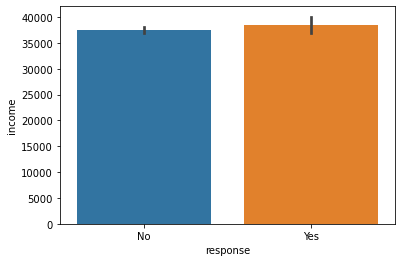

In [86]:
sns.barplot(x="response", y="income", data=file1)
plt.show()

# lab 4

#### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [87]:
file1.columns

file1.dtypes


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [88]:
numerical = file1._get_numeric_data()

categoricals= file1.select_dtypes(['object'])

print(numerical.columns)
print(categoricals.columns)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'response_rate'],
      dtype='object')
Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


### Now we will try to check the normality of the numerical variables visually

   ### *Use seaborn library to construct distribution plots for the numerical variables




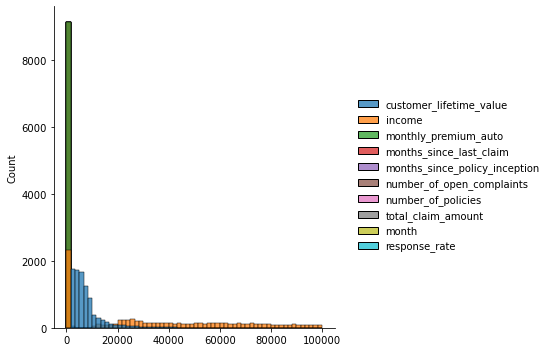

In [89]:
sns.displot(numerical, bins=60)
plt.show()

#not great information so ill try different plots

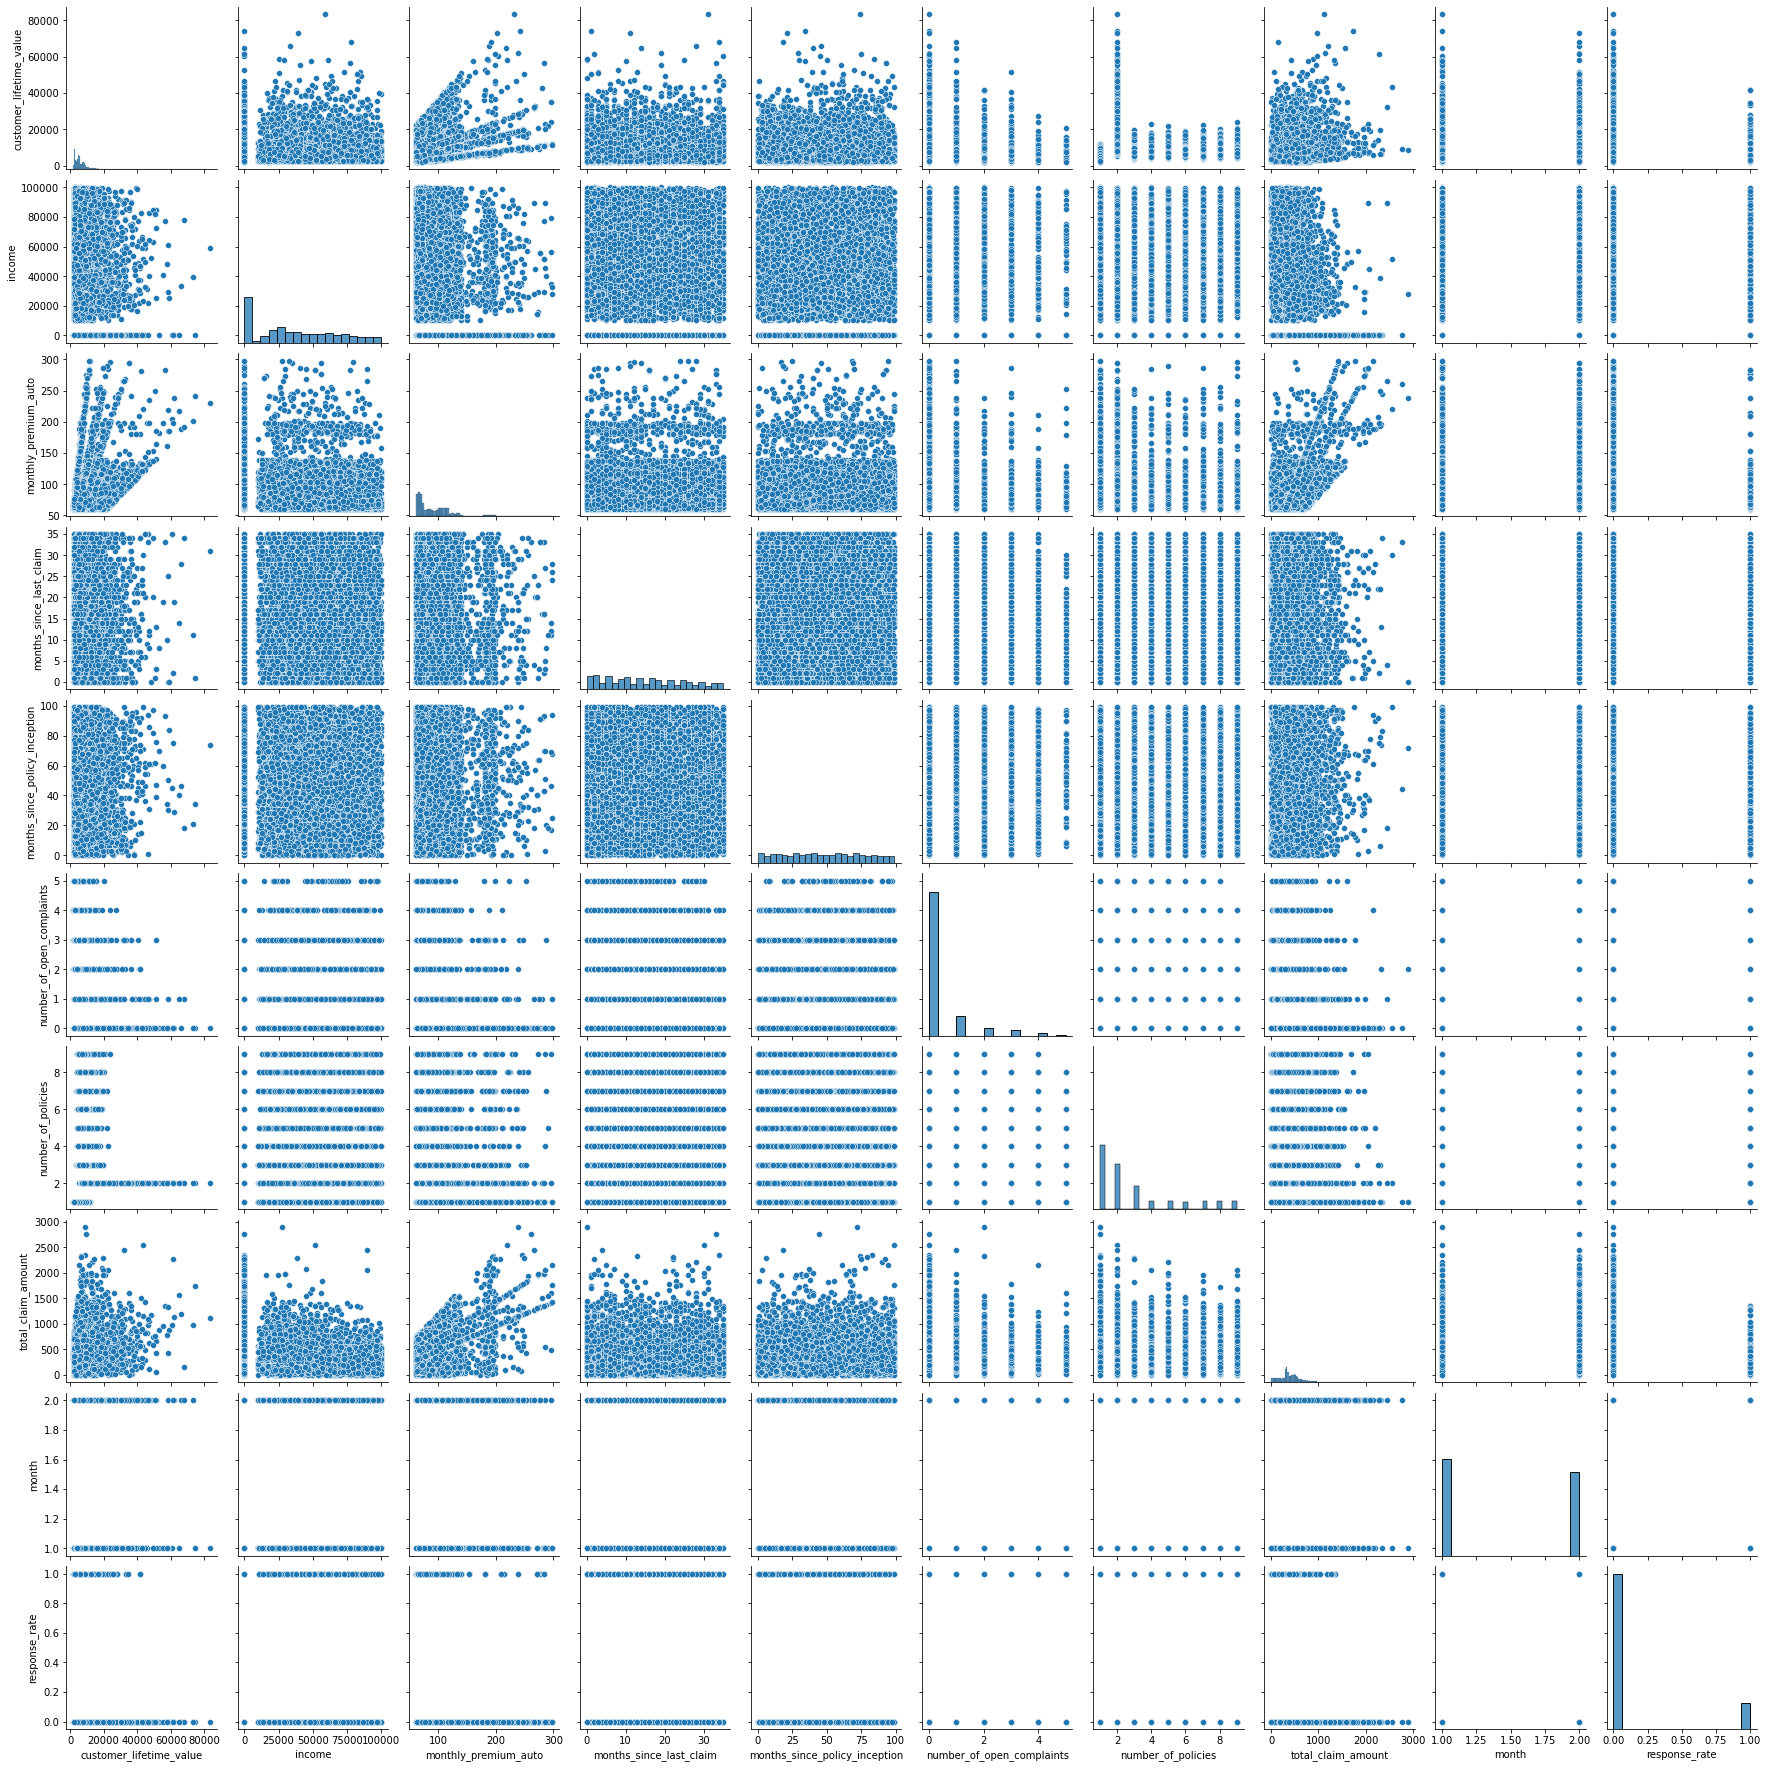

In [33]:
sns.pairplot(numerical)
plt.show()

#plotted everything for the numerical values

   ### *Use Matplotlib to construct histograms

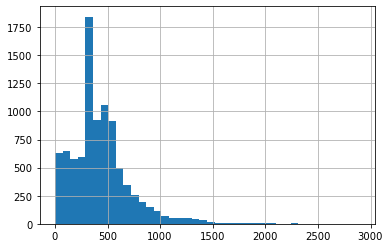

In [90]:
# For example i'll take the total claim amount to plot

numerical['total_claim_amount'].hist(bins=40)
plt.show()

   ### *Do the distributions for different numerical variables look like a normal distribution

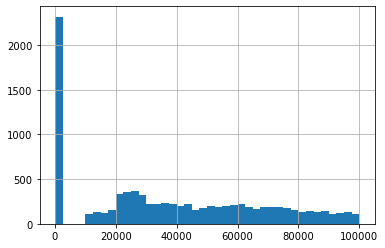

In [91]:
numerical['income'].hist(bins=40)
plt.show()

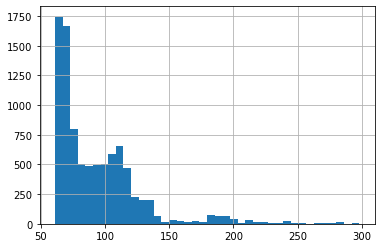

In [92]:
numerical['monthly_premium_auto'].hist(bins=40)
plt.show()

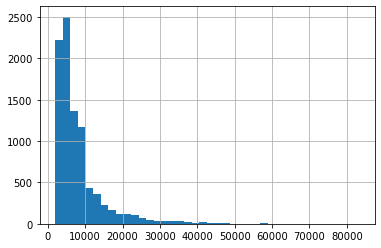

In [93]:
numerical['customer_lifetime_value'].hist(bins=40)
plt.show()

In [271]:
# there seem to be no normal distribution among the columns that i plotted
# Lets drop the columns responserate and month because they are useless

numerical = numerical.drop(['response_rate','month'], axis=1)

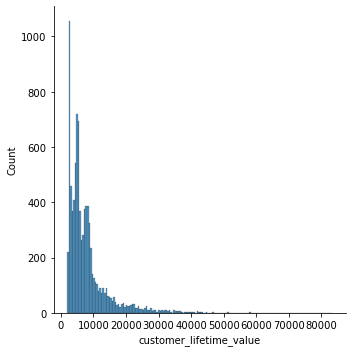

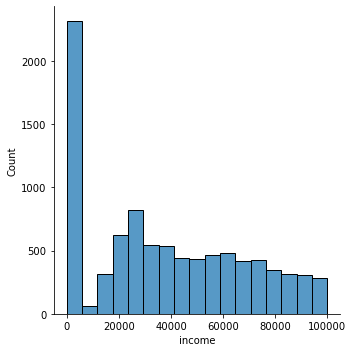

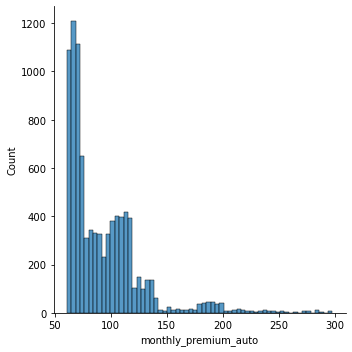

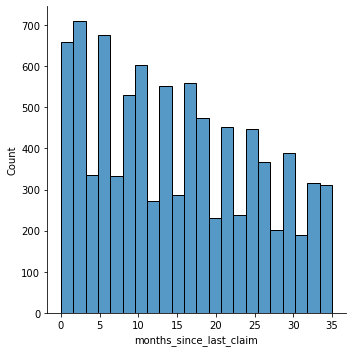

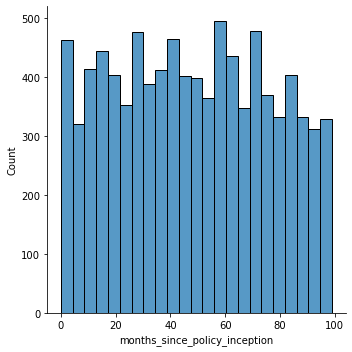

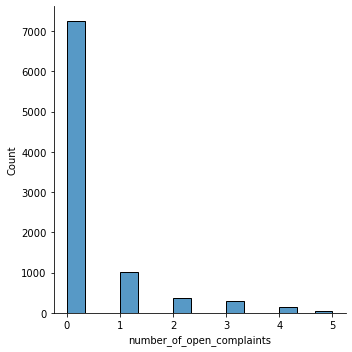

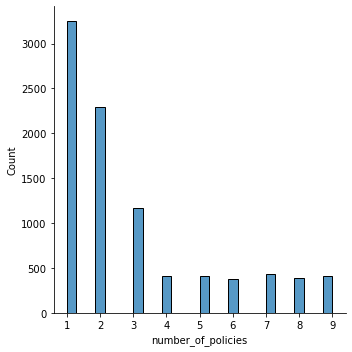

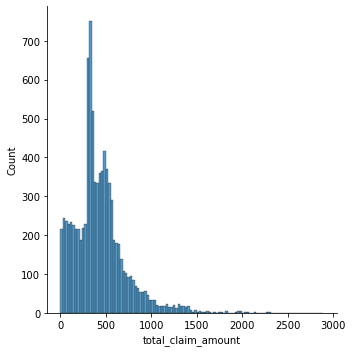

In [272]:
# Later i went back to this and thought that you can get a plot for all numeric by executing a for loop



for column in numerical.columns:
    sns.displot(numerical[column])
    plt.show()

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [308]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


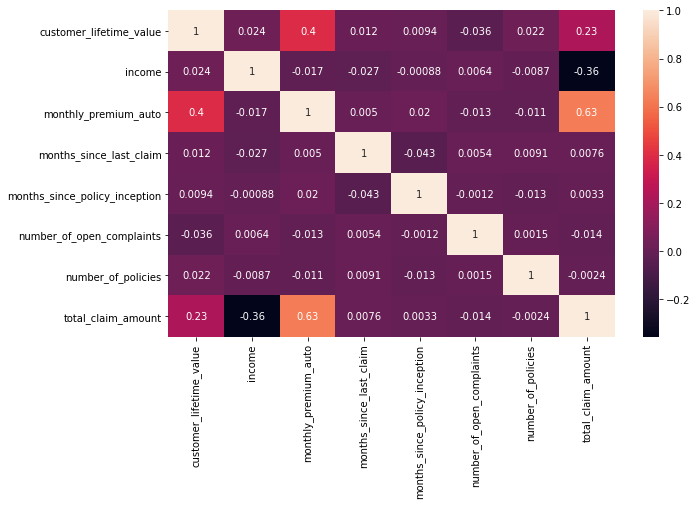

In [309]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [310]:
# i'm not dropping any features as there are no values over 0.9
# In the heatmap above you can see that total claim amount and monthly premium auto have the highest correlation. 
# So this will be the most interesting to look further into. 

# Lab 5 & 6

##     X-y split.



In [311]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X= file1.drop(['total_claim_amount'], axis=1)
y= file1['total_claim_amount']

X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,response_rate
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2,0
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1,0
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,0
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1,0
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2,0


In [312]:
#here we split up the types of data in out dataset

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

X_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Normalize (numerical).

In [313]:
#Standardising the numerical data. I chose to use the min max scaler.

from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

(9134, 9)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0


In [314]:
#after looking at the data i choose to drop the last two collumns as they do  not contain usefull information.

#x_normalized= x_normalized.drop(['month','response_rate'], axis=1)

x_normalized.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0


In [315]:
#now we also want the Categorical data to be standardized.
# i wawnt to see the data we have in the x_cat set

X_cat.head()

#lets drop the customer column here

X_cat= X_cat.drop(['customer'], axis=1)

In [316]:
encoder = OneHotEncoder().fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
onehot_encoded.head()

onehot_encoded.shape

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

(9134, 43)

In [345]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)
X = X.drop(['response_rate','month'], axis=1)


X.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6850, 50)
(2284, 50)
(6850,)
(2284,)


In [347]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [348]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7739417597489628

In [349]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.7661071321121089

In [350]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

142.44162973355813

# Lab | Customer Analysis Round 7

In [351]:
# in this lab we will be looking at making the model more accurate. we will be doing this by looking at 
# multicollinearity and remove insignificant variables, I also will adjust parameters accordingly.
# the first step will be to use the standart scaler instead of the min max as used before.

In [352]:
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler().fit(X_num)
x_stand = Standardtransformer.transform(X_num)
print(x_standardized.shape)
x_stand = pd.DataFrame(x_stand,columns=X_num.columns)
x_stand.head()

(9134, 9)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304,-0.408822
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969,-0.408822
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,1.075304,-0.408822
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,-0.929969,-0.408822
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,1.075304,-0.408822


In [353]:
X_stand = pd.concat([x_stand, onehot_encoded], axis=1)

X_stand.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate,California,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304,-0.408822,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969,-0.408822,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,1.075304,-0.408822,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,-0.929969,-0.408822,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,1.075304,-0.408822,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [354]:
from sklearn.model_selection import train_test_split
X_stand_train, X_stand_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_stand_train.shape)
print(X_stand_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 50)
(1827, 50)
(7307,)
(1827,)


In [355]:
lm = linear_model.LinearRegression()
lm.fit(X_stand_train,y_train)

LinearRegression()

In [356]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_stand_train)
r2_score(y_train, predictions)

0.7743063231234434

In [357]:
predictions = lm.predict(X_stand_test)
r2_score(y_test, predictions)

0.7626528212154184

In [358]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

137.37436549970178

In [359]:
# as you can see this other way of scaling did not do  anything for the model.
# no i'm going to drop all collumns with a low corralation.
# I will drop everything below 0.1 correlation as seen in the heatmap.

In [360]:
X2 = X[['customer_lifetime_value','income','monthly_premium_auto']]

X2.head()

,customer_lifetime_value,income,monthly_premium_auto
0,0.010629,0.562847,0.033755
1,0.062406,0.000000,0.139241
2,0.134960,0.487763,0.198312
3,0.070589,0.000000,0.189873
4,0.011245,0.438443,0.050633


In [361]:
from sklearn.model_selection import train_test_split
X2_stand_train, X2_stand_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

print(X2_stand_train.shape)
print(X2_stand_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 3)
(1827, 3)
(7307,)
(1827,)


In [362]:
lm = linear_model.LinearRegression()
lm.fit(X2_stand_train,y_train)

LinearRegression()

In [363]:
from sklearn.metrics import r2_score
predictions = lm.predict(X2_stand_train)
r2_score(y_train, predictions)

0.5238435700676889

In [364]:
predictions = lm.predict(X2_stand_test)
r2_score(y_test, predictions)

0.49427436026748284

In [365]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

200.52621148331482

In [366]:
# this did not give a usable model. So lets manualy pick some collumns to drop. 
# we drop the lowest and see if it improves the model

In [367]:
X3 = X.drop(['number_of_policies'], axis=1)

X3.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,California,Nevada,Oregon,Washington,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [394]:
from sklearn.model_selection import train_test_split
X3_stand_train, X3_stand_test, y_train, y_test = train_test_split(X3, y, test_size=0.35, random_state=42)

print(X3_stand_train.shape)
print(X3_stand_test.shape)
print(y_train.shape)
print(y_test.shape)

(5937, 49)
(3197, 49)
(5937,)
(3197,)


In [395]:
lm = linear_model.LinearRegression()
lm.fit(X3_stand_train,y_train)

LinearRegression()

In [396]:
from sklearn.metrics import r2_score
predictions = lm.predict(X3_stand_train)
r2_score(y_train, predictions)

0.7758893256432366

In [397]:
predictions = lm.predict(X3_stand_test)
r2_score(y_test, predictions)

0.7626077712217216

In [398]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

138.51504378166985

In [ ]:
# the model did again not improve. I raised test size to 0.35 and this resulted in the highest outcome of my model. 